In [21]:

from pandas import DataFrame
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot of E.ON(a big scale energy company in Europe) 
# stock prices since beginning of 2019 (up to July)

start = '2019-07-01'
end = '2019-07-31'
pred_end_date = '2019-08-31'
API_KEY = '8WAEaoQHbgNVWyEPPMyA'

s_data = quandl.get("FSE/EON_X" , authtoken=API_KEY ,start_date=start, end_date=end)
s_data = s_data.loc[:, "Close"]
s_data.dropna()

sp500 = DataFrame(s_data)

sp500.head()

,Close
Date,
2019-07-01,9.612
2019-07-02,9.761
2019-07-03,9.856
2019-07-04,9.800
2019-07-05,9.664


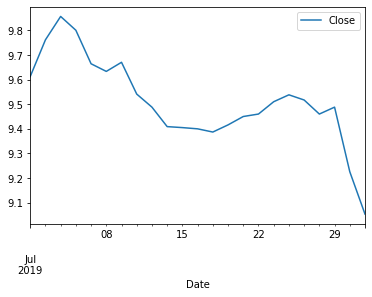

In [22]:
sp500.plot()
plt.show()

In [24]:
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

So = sp500.iloc[sp500.shape[0] - 1, 0]
dt = 1

print(So)

9.054


In [26]:
import pandas as pd

n_of_wkdays = pd.date_range(start = pd.to_datetime(end, 
              format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
              end = pd.to_datetime(pred_end_date, 
              format = "%Y-%m-%d")).to_series(
              ).map(lambda x: 
              1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays
print(T)

22


In [27]:
N = T / dt
print(N)

22.0


In [28]:
t = np.arange(1, int(N) + 1)
print(t)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [32]:
daily_return = sp500.pct_change(1)

print(daily_return)

               Close
Date                
2019-07-01       NaN
2019-07-02  0.015501
2019-07-03  0.009733
2019-07-04 -0.005682
2019-07-05 -0.013878
2019-07-08 -0.003208
2019-07-09  0.003841
2019-07-10 -0.013340
2019-07-11 -0.005555
2019-07-12 -0.008326
2019-07-15 -0.000425
2019-07-16 -0.000532
2019-07-17 -0.001383
2019-07-18  0.003089
2019-07-19  0.003611
2019-07-22  0.001058
2019-07-23  0.005285
2019-07-24  0.002944
2019-07-25 -0.002202
2019-07-26 -0.005989
2019-07-29  0.002960
2019-07-30 -0.027614
2019-07-31 -0.018643


In [34]:
mu = np.mean(daily_return)
print(mu)

Close   -0.002671
dtype: float64


In [35]:
sigma = np.std(daily_return)
print(sigma)

Close    0.009362
dtype: float64


In [36]:
scen_size = 2
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
print(b)

{'1': array([-2.28357968, -1.10617982,  0.9690354 ,  0.00903692,  0.98025093,
       -1.54345183, -0.50080528, -1.21179764,  1.83783082,  0.30687283,
       -0.84343261, -2.10436411,  0.03672164, -0.40221621,  0.22387439,
       -0.26075536,  1.7999295 , -1.09178056,  1.12377702,  0.05702544,
        0.51339607,  1.23998233]), '2': array([ 1.10804934,  0.53636926,  0.58221132, -0.40576707, -1.4183261 ,
        0.25762604,  1.70223604,  0.38739113,  0.4162431 ,  0.02526131,
        1.44463134,  0.6434971 ,  0.03978659,  1.78160663, -1.3905025 ,
       -0.08754095, -0.54670792, -0.68895248, -0.24192351, -1.13894735,
        0.56755823,  0.46373458])}


![alt text](brownian_path.png "Title")

In [37]:
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
print(W)

{'1': array([-2.28357968, -3.3897595 , -2.4207241 , -2.41168717, -1.43143625,
       -2.97488808, -3.47569336, -4.687491  , -2.84966018, -2.54278735,
       -3.38621996, -5.49058407, -5.45386243, -5.85607865, -5.63220425,
       -5.89295961, -4.09303011, -5.18481067, -4.06103365, -4.00400821,
       -3.49061215, -2.25062982]), '2': array([1.10804934, 1.6444186 , 2.22662992, 1.82086285, 0.40253675,
       0.66016278, 2.36239882, 2.74978996, 3.16603306, 3.19129436,
       4.6359257 , 5.2794228 , 5.31920939, 7.10081602, 5.71031352,
       5.62277257, 5.07606464, 4.38711217, 4.14518866, 3.00624131,
       3.57379954, 4.03753411])}


![alt text](drift.png "Title")
![alt text](diffusion.png "Title")
![alt text](drift_diffusion.png "Title")
![alt text](discete_GBM_multistep.png "Title")
![alt text](gbm_general.png "Title")
![alt text](gbm_final.png "Title")